In [120]:
import os
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import plotly
import plotly.graph_objects as go
import plotly.express as px
import kaleido ##pip install -U kaleido ##to save a plotly fig
import sys 
import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

In [121]:
#Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
US_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
WN_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [122]:
df1 = pd.read_csv('Stable_Data_CSV.csv')
df2 = pd.read_csv('6wUsingBL.csv')
df_stable = df2[df2.set_index(['participant_id']).index.isin(df1.set_index(['participant_id']).index)]
df_stable_US = df_stable.loc[(df_stable['arm'] == 1)]
df_stable_WN = df_stable.loc[(df_stable['arm'] == 2)]
print(len(df_stable_US))
print(len(df_stable_WN))
df_stable_US=(df_stable_US[['c_3','sl_1','a_2','q_1','tfi_total.1','tfi_total.2','tfi_total.3']])
df_stable_WN=(df_stable_WN[['sl_2','r_1','e_1','tfi_total.1','tfi_total.2','tfi_total.3']])

31
30


(26, 5) (26, 1) (5, 5) (5, 1)
(25, 4) (25, 1) (5, 4) (5, 1)


/var/folders/ts/975gflv16y9_wd421n6z6w8c0000gn/T/ipykernel_57241/414180287.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  US_regressor.fit(US_x_train, US_y_train)
/var/folders/ts/975gflv16y9_wd421n6z6w8c0000gn/T/ipykernel_57241/414180287.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  WN_regressor.fit(WN_x_train, WN_y_train)


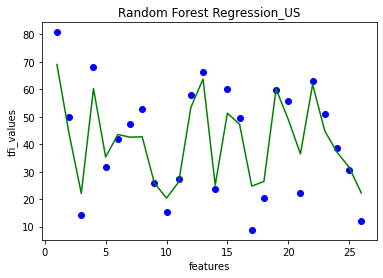

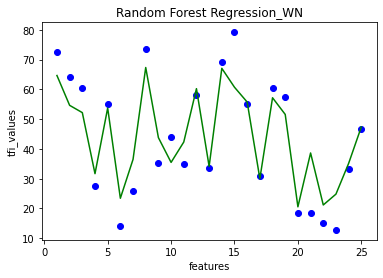

US_y_actual
[41.2 24.4 63.6 34.  33.2]


US_y_predicted
[42.724 36.872 44.432 38.388 58.324]


US_mae
12.5352


WN_y_actual
[72.8 64.  70.8 43.6 65.6]


WN_y_predicted
[60.184 58.22  52.932 43.46  67.056]


WN_mae
7.572000000000021


In [123]:
def data_prep(df):
    train_data=df.iloc[:-5,:]
    test_data =df.iloc[-5:,:]
    #Train Test Split 
    x_train=train_data.drop(['tfi_total.2','tfi_total.3'],axis=1)
    y_train=train_data[['tfi_total.2']]
    x_test=test_data.drop(['tfi_total.2','tfi_total.3'],axis=1)
    y_test=test_data[['tfi_total.2']]
    print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)
    return x_train, x_test, y_train, y_test

US_x_train, US_x_test, US_y_train, US_y_test=data_prep(df_stable_US)
WN_x_train, WN_x_test, WN_y_train, WN_y_test=data_prep(df_stable_WN)


# fit the regressor with x and y data
US_regressor.fit(US_x_train, US_y_train)
WN_regressor.fit(WN_x_train, WN_y_train) 

# US_Visualising the Random Forest Regression results
US_yhat=US_regressor.predict(US_x_test)
# Scatter plot for original train data
xtrn=list(range(1,len(US_x_train)+1))
plt.scatter(xtrn, US_y_train, color = 'blue') 

# plot predicted train data
plt.plot(xtrn, US_regressor.predict(US_x_train),color = 'green')

# Scatter plot for original test data
x=len(US_x_train)+1
y=x+(len(US_x_test))
xtst=list(range(x,y))
#plt.scatter(xtst, US_y_test, color = 'purple') 

# plot predicted test data
#plt.plot(xtst, US_yhat,color = 'red')
plt.title('Random Forest Regression_US')
plt.xlabel('features')
plt.ylabel('tfi_values')
plt.show()


# WN_Visualising the Random Forest Regression results
WN_yhat=WN_regressor.predict(WN_x_test)
# Scatter plot for original train data
WN_xtrn=list(range(1,len(WN_x_train)+1))
plt.scatter(WN_xtrn, WN_y_train, color = 'blue') 

# plot predicted train data
plt.plot(WN_xtrn, WN_regressor.predict(WN_x_train),color = 'green')

# Scatter plot for original test data
WN_x=len(WN_x_train)+1
WN_y=WN_x+(len(WN_x_test))
WN_xtst=list(range(WN_x,WN_y))
#plt.scatter(WN_xtst, WN_y_test, color = 'purple') 

# plot predicted test data
#plt.plot(WN_xtst, WN_yhat,color = 'red')
plt.title('Random Forest Regression_WN')
plt.xlabel('features')
plt.ylabel('tfi_values')
plt.show()

US_y_test=US_y_test.values.flatten()
print("US_y_actual")
print(US_y_test)
print("\n")
print("US_y_predicted")
print(US_yhat)
print("\n")
error=mean_absolute_error(US_y_test,US_yhat)
print("US_mae")
print(error)
print("\n")
WN_y_test=WN_y_test.values.flatten()
print("WN_y_actual")
print(WN_y_test)
print("\n")
print("WN_y_predicted")
print(WN_yhat)
print("\n")
error=mean_absolute_error(WN_y_test,WN_yhat)
print("WN_mae")
print(error)